In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/METR-LA.csv


## Problem Statement
Urban areas are increasingly facing severe traffic congestion due to growing number of vehicles, especially during peak hours and specific days. This congestion causes delays inefficiency and frustration for commuters. accurate prediction of traffic flow is essential to help city planners and individuals make informed decisions about scheduling, routing, and congestion management. the problem is to develop a machine learning model capable of predicting traffic congestion levels across multiple roads in an urban setting using historical data and temporal features(day of the week and time of day).
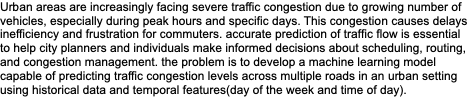
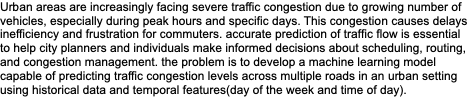
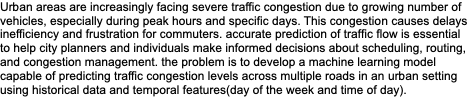
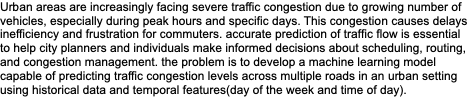

The project uses the METR-LA traffic speed dataset (downloaded from Zenodo and imported into Kaggle).
It contains traffic speed readings (in mph) collected every 5 minutes from 208 loop detectors across Los Angeles between March and June 2012.
Each column represents a distinct street (sensor), and timestamps represent time-series records.

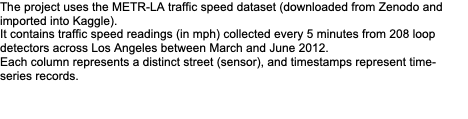
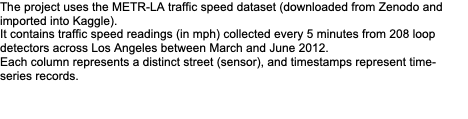
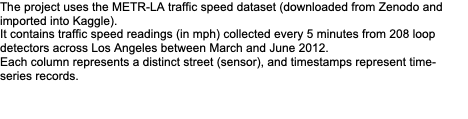
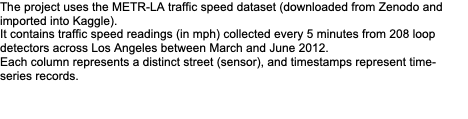

In [10]:
import pandas as pd

file_path = "/kaggle/input/METR-LA.csv"

# Load without parse_dates first
df = pd.read_csv(file_path)

# Show basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nFirst few rows:")
display(df.head())
print(df.info())
print("no of null values",df.isna().sum().sum())

Shape: (34272, 208)

Columns:
 ['Unnamed: 0', '773869', '767541', '767542', '717447', '717446', '717445', '773062', '767620', '737529', '717816', '765604', '767471', '716339', '773906', '765273', '716331', '771667', '716337', '769953', '769402', '769403', '769819', '769405', '716941', '717578', '716960', '717804', '767572', '767573', '773012', '773013', '764424', '769388', '716328', '717819', '769941', '760987', '718204', '718045', '769418', '768066', '772140', '773927', '760024', '774012', '774011', '767609', '769359', '760650', '716956', '769831', '761604', '717495', '716554', '773953', '767470', '716955', '764949', '773954', '767366', '769444', '773939', '774067', '769443', '767750', '767751', '767610', '773880', '764766', '717497', '717490', '717491', '717492', '717493', '765176', '717498', '717499', '765171', '718064', '718066', '765164', '769431', '769430', '717610', '767053', '767621', '772596', '772597', '767350', '767351', '716571', '773023', '767585', '773024', '717483', '718

,Unnamed: 0,773869,767541,767542,717447,717446,717445,773062,767620,737529,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
0,2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
1,2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2,2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
3,2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
4,2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34272 entries, 0 to 34271
Columns: 208 entries, Unnamed: 0 to 769373
dtypes: float64(207), object(1)
memory usage: 54.4+ MB
None
no of null values 0


dataset has no null values,has 208 various sensors and has a total of 34,272 entries

we convert the dataset to a tidier version by listing each sensor as a street no and convert the 208 columns to 1 (street_no)

 Loaded METR-LA dataset successfully
Shape: (34272, 208)


,timestamp,773869,767541,767542,717447,717446,717445,773062,767620,737529,...,772167,769372,774204,769806,717590,717592,717595,772168,718141,769373
0,2012-03-01 00:00:00,64.375000,67.625000,67.125000,61.500000,66.875000,68.750000,65.125,67.125,59.625000,...,45.625000,65.500,64.500000,66.428571,66.875,59.375000,69.000000,59.250000,69.000000,61.875
1,2012-03-01 00:05:00,62.666667,68.555556,65.444444,62.444444,64.444444,68.111111,65.000,65.000,57.444444,...,50.666667,69.875,66.666667,58.555556,62.000,61.111111,64.444444,55.888889,68.444444,62.875
2,2012-03-01 00:10:00,64.000000,63.750000,60.000000,59.000000,66.500000,66.250000,64.500,64.250,63.875000,...,44.125000,69.000,56.500000,59.250000,68.125,62.500000,65.625000,61.375000,69.857143,62.000
3,2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000
4,2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000,0.000000,...,0.000000,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000



 Converted to tidy format:


,timestamp,street_no,traffic_speed,day_of_week,hour,minute_of_day,sin_time,cos_time
0,2012-03-01 00:00:00,773869,64.375000,3,0,0,0.000000,1.000000
1,2012-03-01 00:05:00,773869,62.666667,3,0,5,0.021815,0.999762
2,2012-03-01 00:10:00,773869,64.000000,3,0,10,0.043619,0.999048
3,2012-03-01 00:15:00,773869,0.000000,3,0,15,0.065403,0.997859
4,2012-03-01 00:20:00,773869,0.000000,3,0,20,0.087156,0.996195


Number of streets: 207
Time range: 2012-03-01 00:00:00 → 2012-06-27 23:55:00


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


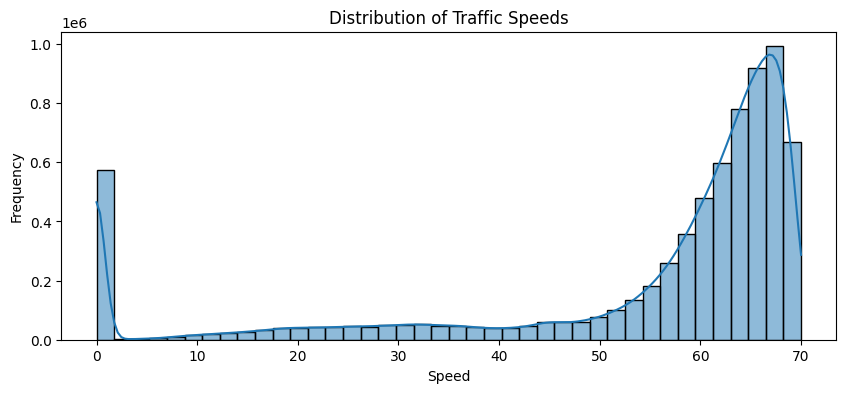

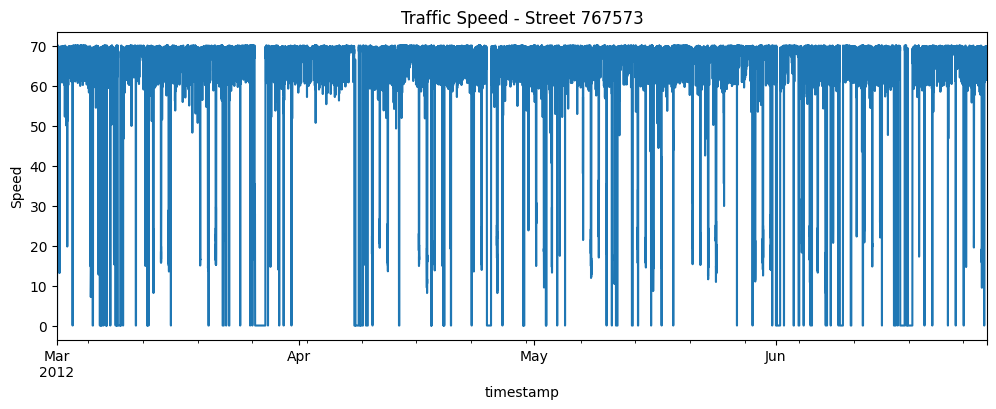

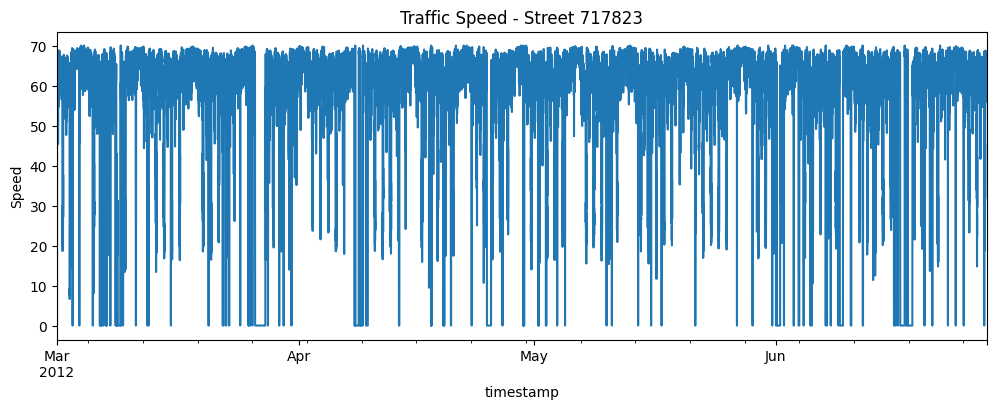

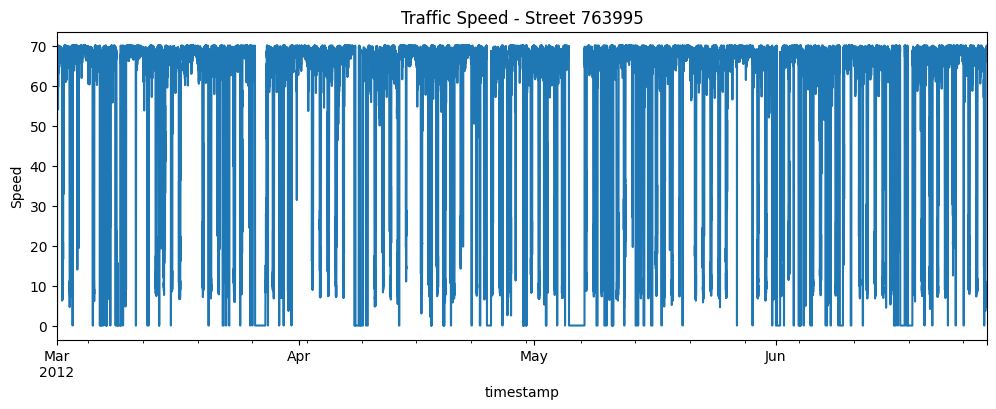

no of null values 0
dataset shape (7094304, 8)
                 timestamp  traffic_speed  day_of_week          hour  \
count              7094304   7.094304e+06    7094304.0  7.094304e+06   
mean   2012-04-29 11:57:30   5.371902e+01          3.0  1.150000e+01   
min    2012-03-01 00:00:00   0.000000e+00          0.0  0.000000e+00   
25%    2012-03-30 17:58:45   5.312500e+01          1.0  5.750000e+00   
50%    2012-04-29 11:57:30   6.244444e+01          3.0  1.150000e+01   
75%    2012-05-29 05:56:15   6.625000e+01          5.0  1.725000e+01   
max    2012-06-27 23:55:00   7.000000e+01          6.0  2.300000e+01   
std                    NaN   2.026143e+01          2.0  6.922187e+00   

       minute_of_day      sin_time      cos_time  
count   7.094304e+06  7.094304e+06  7.094304e+06  
mean    7.175000e+02 -2.045202e-18 -5.159277e-17  
min     0.000000e+00 -1.000000e+00 -1.000000e+00  
25%     3.587500e+02 -7.071068e-01 -7.071068e-01  
50%     7.175000e+02  6.123234e-17 -6.123234e-17 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# STEP 1: Load dataset
# =======================
file_path = "/kaggle/input/METR-LA.csv"

# Rename timestamp column and parse dates
df = pd.read_csv(file_path)
df.rename(columns={'Unnamed: 0': 'timestamp'}, inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])

print(" Loaded METR-LA dataset successfully")
print("Shape:", df.shape)
display(df.head())

# =======================
# STEP 2: Convert to tidy format (for ML)
# =======================
# Convert wide → long
tidy_df = df.melt(
    id_vars='timestamp',
    var_name='street_no',
    value_name='traffic_speed'
)

# =======================
# STEP 3: Add derived temporal features
# =======================
tidy_df['day_of_week'] = tidy_df['timestamp'].dt.dayofweek     # Monday=0
tidy_df['hour'] = tidy_df['timestamp'].dt.hour
tidy_df['minute_of_day'] = tidy_df['hour'] * 60 + tidy_df['timestamp'].dt.minute

# Optional cyclical encoding (for ML models)
tidy_df['sin_time'] = np.sin(2 * np.pi * tidy_df['minute_of_day'] / 1440)
tidy_df['cos_time'] = np.cos(2 * np.pi * tidy_df['minute_of_day'] / 1440)

print("\n Converted to tidy format:")
display(tidy_df.head())

# =======================
# STEP 4: Basic checks
# =======================
print("Number of streets:", tidy_df['street_no'].nunique())
print("Time range:", tidy_df['timestamp'].min(), "→", tidy_df['timestamp'].max())

# =======================
# STEP 5: Simple EDA visualization
# =======================
plt.figure(figsize=(10,4))
sns.histplot(tidy_df['traffic_speed'].dropna(), bins=40, kde=True)
plt.title("Distribution of Traffic Speeds")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.show()

# Sample a few random streets to visualize
sample_streets = np.random.choice(tidy_df['street_no'].unique(), 3, replace=False)
for s in sample_streets:
    subset = tidy_df[tidy_df['street_no'] == s].set_index('timestamp')
    subset['traffic_speed'].plot(figsize=(12,4), title=f"Traffic Speed - Street {s}")
    plt.ylabel("Speed")
    plt.show()

# =======================
# STEP 6: Save tidy data for ML
# =======================
print("no of null values",tidy_df.isna().sum().sum())
print("dataset shape",tidy_df.shape)
print(tidy_df.describe())
tidy_df.to_csv("/kaggle/working/metrla_tidy.csv", index=False)
print(" Saved tidy dataset to /kaggle/working/metrla_tidy.csv")


**INFERENCE**

Each line represents traffic speed over time for one street.
Sudden dips correspond to congestion periods, while flat zeros may indicate either prolonged jams or sensor downtime.
The general pattern reflects daily oscillations — slower speeds during mornings and evenings (commuting hours) and faster movement late at night.

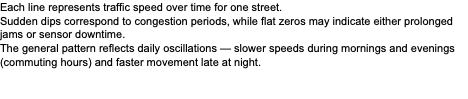
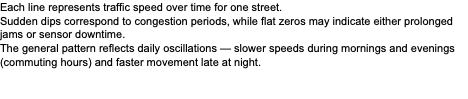
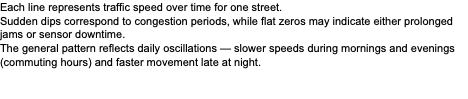
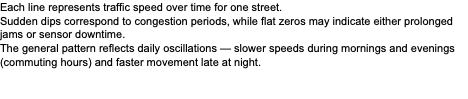

* converting the 207 different columns into one has now increased the number of records of our dataset to 7,094,304 with 8 columns
* We add sine and cosine of time so the model understands that time repeats, not that it resets
Without this, our traffic model might think 11 PM and 12 AM are totally unrelated, which hurts daily rhythm prediction and model building gets tougher.

## Data analysis

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# load tidy_df if not already in memory
try:
    tidy_df
except NameError:
    tidy_df = pd.read_csv("/kaggle/working/metrla_tidy.csv", parse_dates=['timestamp'])

# keep only a random 20 000 samples for light EDA
tidy_sample = tidy_df.sample(20000, random_state=42).copy()

# ensure correct types
tidy_sample['street_no'] = tidy_sample['street_no'].astype(str)
tidy_sample['day_of_week'] = tidy_sample['day_of_week'].astype(int)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


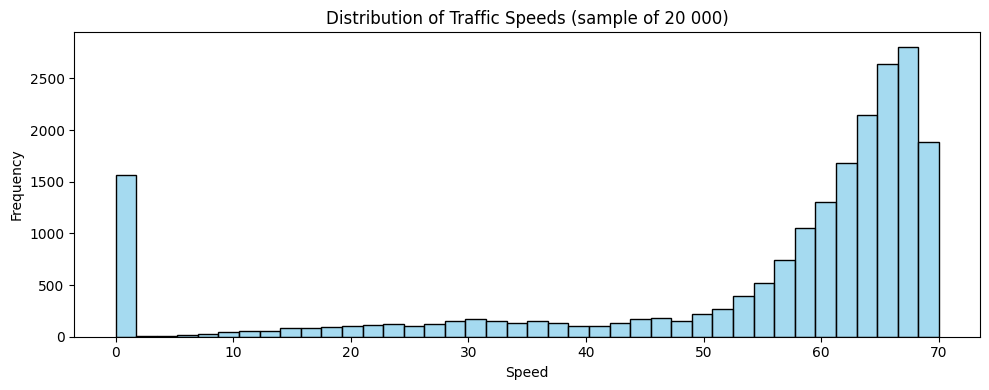

In [13]:
plt.figure(figsize=(10,4))
sns.histplot(tidy_sample['traffic_speed'].dropna(), bins=40, color='skyblue')
plt.title("Distribution of Traffic Speeds (sample of 20 000)")
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**INFERENCE**

The distribution shows a major concentration around 60–70 mph, indicating smooth highway traffic for most readings.
A smaller but significant spike at 0 mph suggests sensor detections during standstill or heavy congestion events (e.g., red lights or road blocks).
Intermediate speeds are less common, revealing a bimodal traffic behavior: either free-flowing or congested.

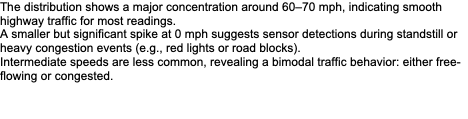
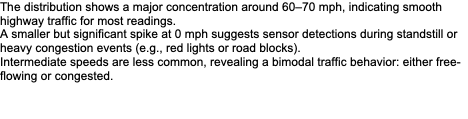
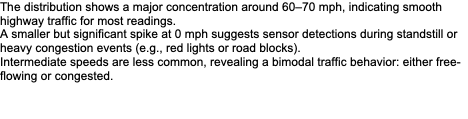
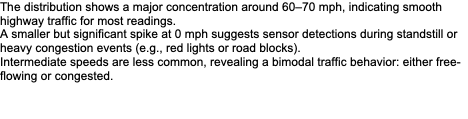

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


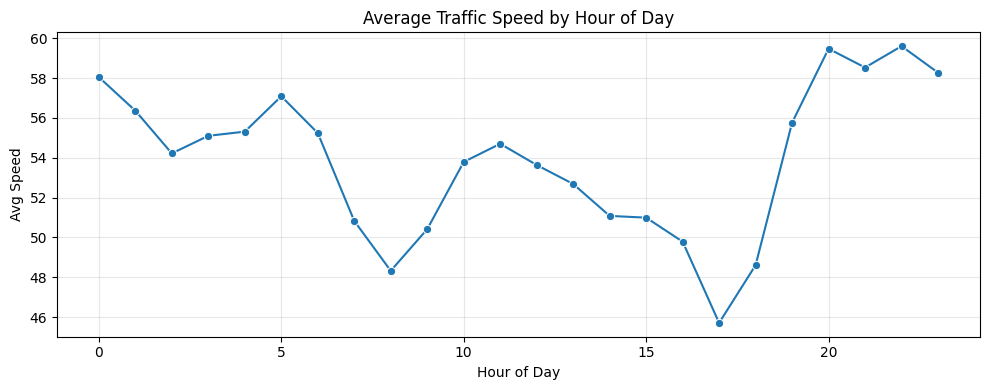

In [14]:
hourly = tidy_sample.groupby(tidy_sample['timestamp'].dt.hour)['traffic_speed'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x='timestamp', y='traffic_speed', data=hourly, marker='o')
plt.title("Average Traffic Speed by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Avg Speed")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**INFERENCE**
 
The average speed shows distinct rush-hour dips around 8 AM and 5–7 PM, with a recovery in late evening.
This confirms strong time-of-day dependencies and validates the inclusion of temporal features like hour and day in the model.

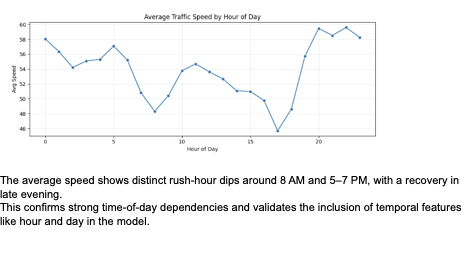
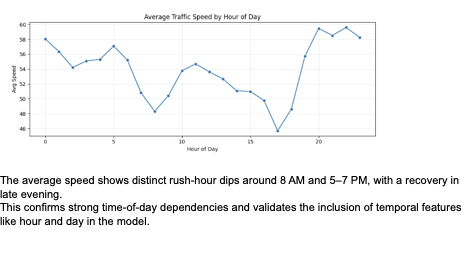
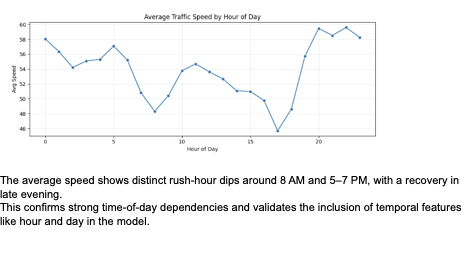
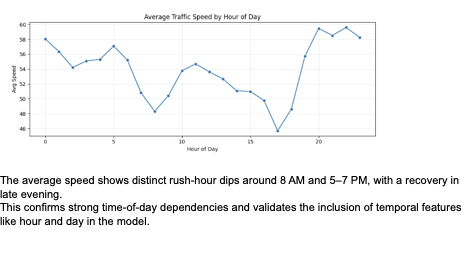

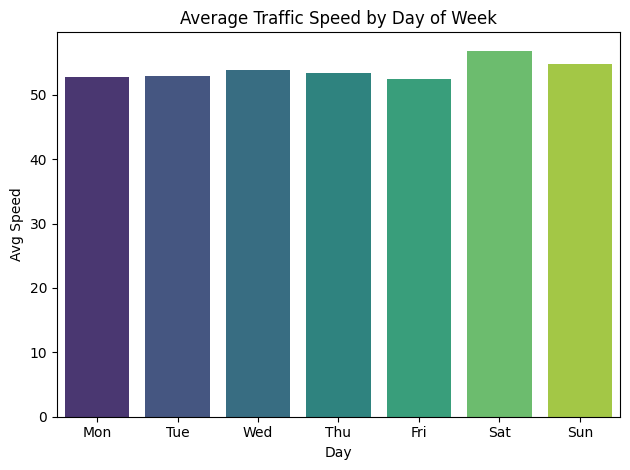

In [15]:
dow_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
dow = tidy_sample.groupby('day_of_week')['traffic_speed'].mean().reset_index()
dow['day_name'] = dow['day_of_week'].map(dow_map)

sns.barplot(x='day_name', y='traffic_speed', data=dow, palette='viridis')
plt.title("Average Traffic Speed by Day of Week")
plt.xlabel("Day")
plt.ylabel("Avg Speed")
plt.tight_layout()
plt.show()


**INFERENCE**

Average weekday speeds are slightly lower due to heavy commuter traffic.
Weekends (especially Saturday) exhibit the highest average speeds, highlighting lighter road usage.
This reinforces the decision to use day_of_week as a categorical predictor.

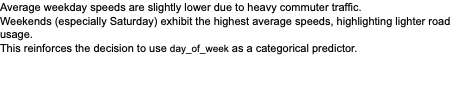
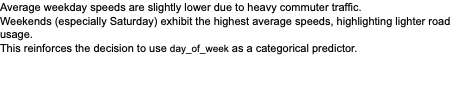
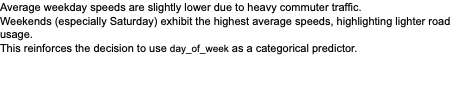
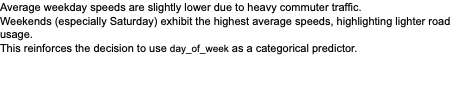

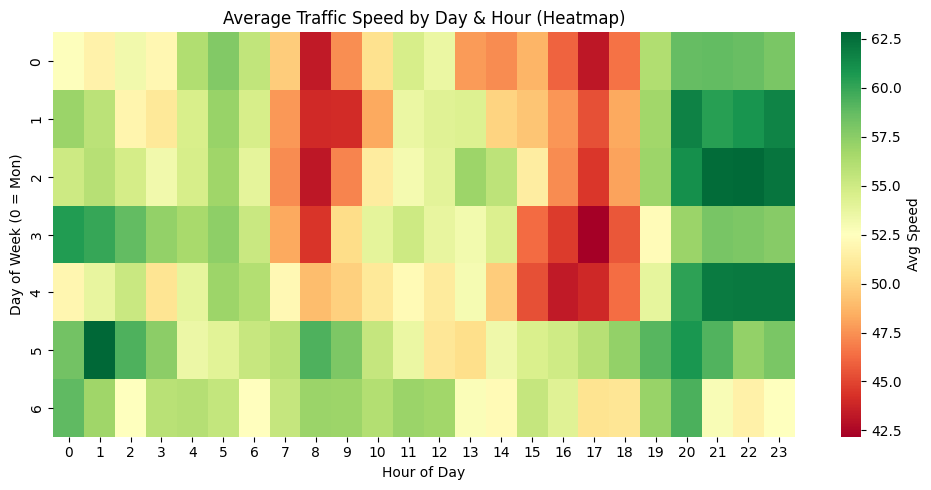

In [16]:
tmp = tidy_df.copy()
tmp['hour'] = tmp['timestamp'].dt.hour
heat = tmp.groupby(['day_of_week', 'hour'])['traffic_speed'].mean().reset_index()

# ✅ FIX: use keyword args for pivot
pivot = heat.pivot(index='day_of_week', columns='hour', values='traffic_speed')

plt.figure(figsize=(10,5))
sns.heatmap(pivot, cmap='RdYlGn', cbar_kws={'label': 'Avg Speed'})
plt.title("Average Traffic Speed by Day & Hour (Heatmap)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week (0 = Mon)")
plt.tight_layout()
plt.show()


**INFERENCE**

The heatmap vividly displays cyclic congestion behavior:
•	Red/orange zones at weekday mornings and evenings represent rush-hour congestion.
•	Green/yellow areas on weekends or nights indicate free-flowing traffic.
This temporal–cyclic pattern further justifies the use of sine and cosine encodings for time-based variables.

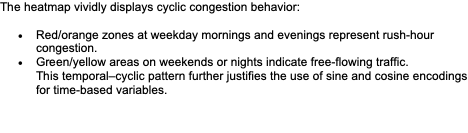
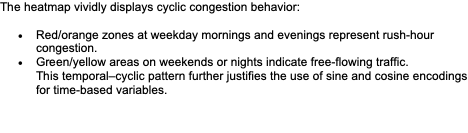
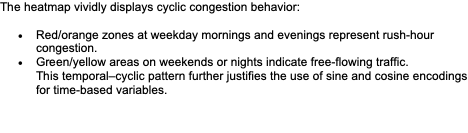
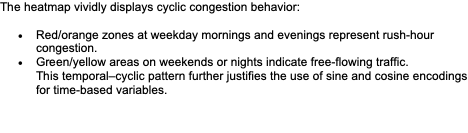

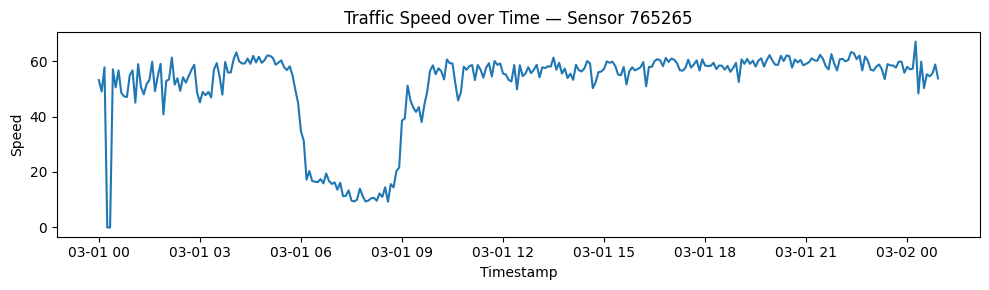

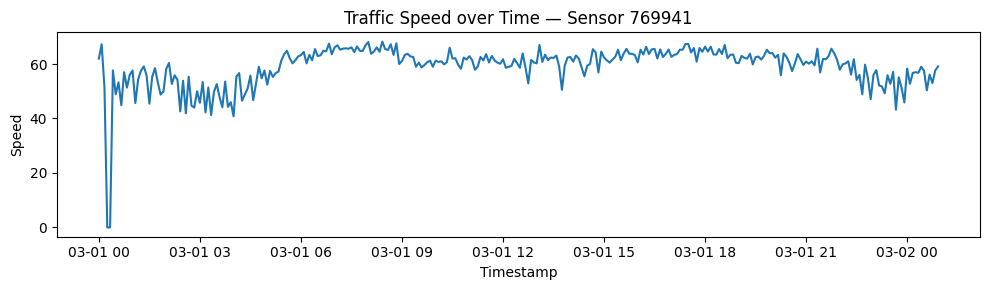

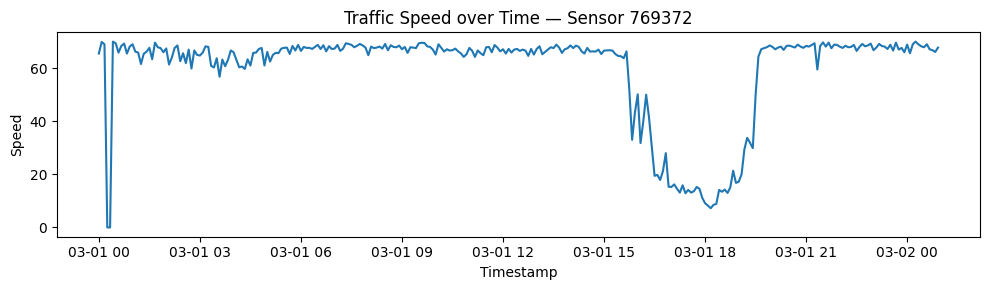

In [17]:
sample_sensors = np.random.choice(tidy_df['street_no'].unique(), 3, replace=False)

for s in sample_sensors:
    subset = tidy_df[tidy_df['street_no']==s].iloc[:300]  # limit to first 300 timestamps
    plt.figure(figsize=(10,3))
    plt.plot(subset['timestamp'], subset['traffic_speed'], lw=1.5)
    plt.title(f"Traffic Speed over Time — Sensor {s}")
    plt.xlabel("Timestamp")
    plt.ylabel("Speed")
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


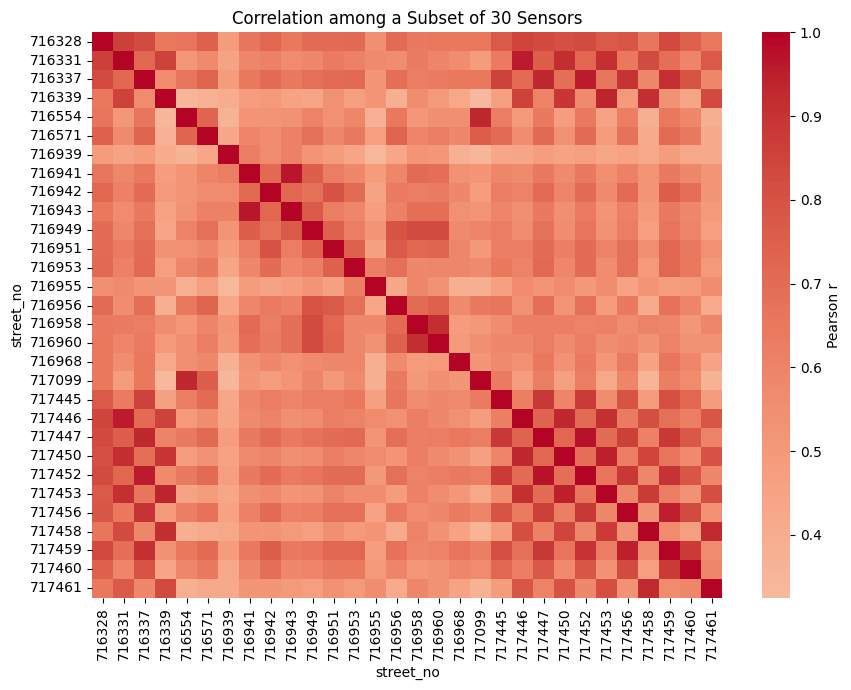

In [18]:
subset_sensors = sorted(tidy_df['street_no'].unique())[:30]
wide = tidy_df[tidy_df['street_no'].isin(subset_sensors)].pivot(
    index='timestamp', columns='street_no', values='traffic_speed'
)

corr = wide.corr().fillna(0)

plt.figure(figsize=(9,7))
sns.heatmap(corr, cmap='coolwarm', center=0, cbar_kws={'label':'Pearson r'})
plt.title("Correlation among a Subset of 30 Sensors")
plt.tight_layout()
plt.show()


**INFERENCE**

The correlation heatmap demonstrates that spatially adjacent sensors (streets close to each other) exhibit strong speed correlations.
This implies that congestion in one road often propagates to nearby roads, an insight that can be extended to spatial modeling in future work.

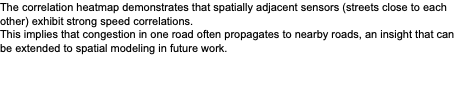
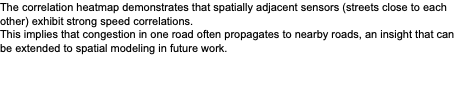
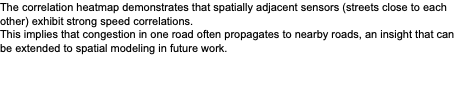
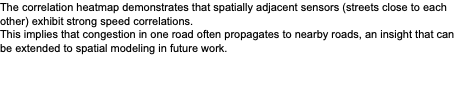

## Model Building


In this baseline model, we predict that the next traffic speed will be identical to the previous recorded speed.
* Traffic speed changes slowly over short intervals
* The METR-LA dataset records speeds at 5-minute intervals.
* In most urban settings, traffic speed doesn’t fluctuate drastically between consecutive readings — it evolves smoothly.
* 
Thus, predicting the next value as the same as the last often works quite well.



In [19]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import joblib
import warnings
warnings.filterwarnings('ignore')


Lag Feature Engineering
We introduce lag features to capture short-term temporal dependencies:

* Lag 1: Traffic speed 5 minutes ago

* Lag 2: Traffic speed 10 minutes ago

* Lag 12: Traffic speed 1 hour ago

The model will use these lag values to predict the next value — one step ahead equivalent to a 5-minute forecast.



In [20]:
# tidy_df must exist
df = tidy_df.copy()  # your tidy dataframe from earlier
df = df.sort_values(['street_no','timestamp']).reset_index(drop=True)

# choose lags (in steps). METR-LA is 5-min resolution, so lag 1 = 5min, lag 12 = 60min, lag 288 = 1 day
LAGS = [1, 2, 12]   # small to keep it fast
HORIZON = 1         # 1 step ahead (5 minutes). Change to e.g., 3 for 15-min ahead.

rows = []
for sensor, g in df.groupby('street_no'):
    g = g.sort_values('timestamp').reset_index(drop=True)
    for lag in LAGS:
        g[f'lag_{lag}'] = g['traffic_speed'].shift(lag)
    # target: t + HORIZON
    g['target'] = g['traffic_speed'].shift(-HORIZON)
    # keep basic features
    g['day_of_week'] = g['timestamp'].dt.dayofweek
    g['minute_of_day'] = g['timestamp'].dt.hour*60 + g['timestamp'].dt.minute
    g['hour'] = g['timestamp'].dt.hour
    g['sensor'] = sensor
    rows.append(g)

panel = pd.concat(rows).reset_index(drop=True)
panel = panel.dropna().reset_index(drop=True)   # remove rows with NaN due to shifts

print("Panel shape:", panel.shape)
panel.head()


Panel shape: (7091613, 13)


,timestamp,street_no,traffic_speed,day_of_week,hour,minute_of_day,sin_time,cos_time,lag_1,lag_2,lag_12,target,sensor
0,2012-03-01 01:00:00,716328,66.000000,3,1,60,0.258819,0.965926,64.375000,66.777778,66.875000,67.888889,716328
1,2012-03-01 01:05:00,716328,67.888889,3,1,65,0.279829,0.960050,66.000000,64.375000,67.444444,66.750000,716328
2,2012-03-01 01:10:00,716328,66.750000,3,1,70,0.300706,0.953717,67.888889,66.000000,65.000000,63.000000,716328
3,2012-03-01 01:15:00,716328,63.000000,3,1,75,0.321439,0.946930,66.750000,67.888889,0.000000,65.000000,716328
4,2012-03-01 01:20:00,716328,65.000000,3,1,80,0.342020,0.939693,63.000000,66.750000,0.000000,65.555556,716328


After processing, we combine all streets into one large “panel” DataFrame and remove rows with missing lag values (caused by the shifting).

Train–Validation–Test Split (Time-Based)
To preserve temporal integrity, we split the data by timestamp rather than randomly:

70% → Training set

15% → Validation set

15% → Test set

In [21]:
# determine unique timestamps and split
unique_times = sorted(panel['timestamp'].unique())
n = len(unique_times)
train_cut = int(0.70 * n)
val_cut = int(0.85 * n)

train_times = unique_times[:train_cut]
val_times = unique_times[train_cut:val_cut]
test_times = unique_times[val_cut:]

train = panel[panel['timestamp'].isin(train_times)].reset_index(drop=True)
val   = panel[panel['timestamp'].isin(val_times)].reset_index(drop=True)
test  = panel[panel['timestamp'].isin(test_times)].reset_index(drop=True)

print("Train / Val / Test shapes:", train.shape, val.shape, test.shape)


Train / Val / Test shapes: (4964067, 13) (1063773, 13) (1063773, 13)


In [22]:
# persistence: predict using lag_1 (i.e., previous timestep)
y_true = test['target'].values
y_pred = test['lag_1'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f"Persistence baseline -> MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# per-sensor MAE summary (optional)
per_sensor = test.groupby('sensor').apply(lambda g: mean_absolute_error(g['target'], g['lag_1']))
print("Sample per-sensor MAE (first 10):")
print(per_sensor.sort_values().head(10))


Persistence baseline -> MAE: 3.4246, RMSE: 8.3198
Sample per-sensor MAE (first 10):
sensor
771667    1.740042
771673    2.069821
764120    2.099031
717595    2.190421
767455    2.228135
774012    2.266969
767495    2.270575
767523    2.303522
767621    2.326025
717582    2.334758
dtype: float64


XGBoost is a powerful ensemble learning algorithm that combines multiple decision trees sequentially, where each tree tries to correct the errors of the previous one.
* Unlike the persistence model, XGBoost can learn complex patterns between lag features, time-of-day, and traffic speed.
* XGBoost’s regularization reduces overfitting even with noisy traffic sensor readings.
* Ideal for large datasets like METR-LA with many roads and timestamps.

In [23]:
# XGBOOST


from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

FEATS = [f'lag_{l}' for l in LAGS] + ['day_of_week','minute_of_day']  # simple feature set
# encode sensor id as label (helps to learn sensor-specific offsets)
le = LabelEncoder()
train['sensor_enc'] = le.fit_transform(train['sensor'])
val['sensor_enc'] = le.transform(val['sensor'])
test['sensor_enc'] = le.transform(test['sensor'])
FEATS += ['sensor_enc']

X_train = train[FEATS]
y_train = train['target']
X_val   = val[FEATS]
y_val   = val['target']
X_test  = test[FEATS]
y_test  = test['target']

# Train XGBoost regressor
model = xgb.XGBRegressor(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    tree_method='hist',
    verbosity=0,
    n_jobs=4,
    random_state=42
)
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=20,
    verbose=False
)

# Predict & evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"XGBoost -> MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Save model
joblib.dump(model, "/kaggle/working/xgb_metrla.pkl")
print("Saved XGBoost model to /kaggle/working/xgb_metrla.pkl")


XGBoost -> MAE: 3.7796, RMSE: 7.9107
Saved XGBoost model to /kaggle/working/xgb_metrla.pkl


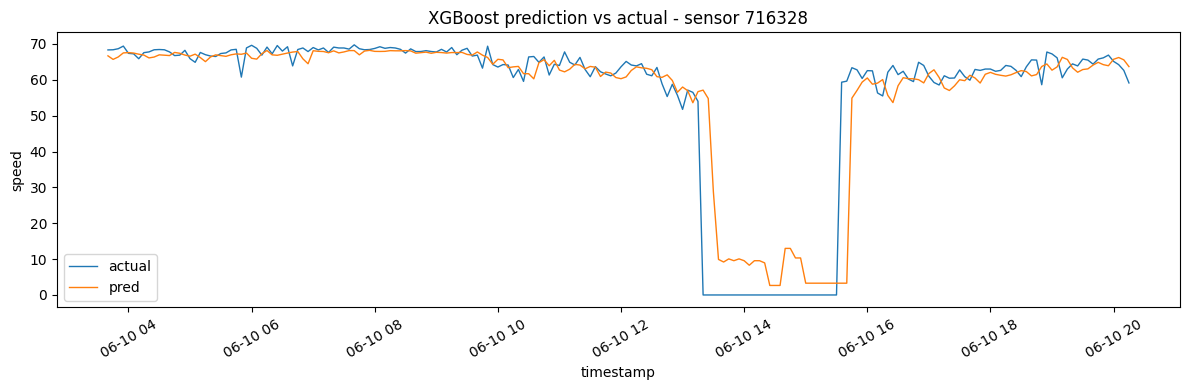

In [24]:
import matplotlib.pyplot as plt
# pick a sensor to visualize
sensor_to_plot = test['sensor'].unique()[0]
sel = test[test['sensor'] == sensor_to_plot].copy()
sel['pred'] = model.predict(sel[FEATS])
sel = sel.sort_values('timestamp').iloc[:200]  # plot first 200 points to keep it small

plt.figure(figsize=(12,4))
plt.plot(sel['timestamp'], sel['target'], label='actual', lw=1)
plt.plot(sel['timestamp'], sel['pred'], label='pred', lw=1)
plt.title(f'XGBoost prediction vs actual - sensor {sensor_to_plot}')
plt.legend()
plt.xlabel('timestamp')
plt.ylabel('speed')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


**Observation**
XGBoost slightly increases MAE but reduces RMSE, meaning it handles larger deviations better than the persistence model.
This shows improved performance during volatile traffic periods, such as peak hours or after incidents.

LSTM networks are a specialized form of recurrent neural networks designed to learn temporal dependencies — patterns that evolve over time.
This makes them ideal for traffic prediction, where the current flow depends strongly on the recent past.
* LSTMs remember information over many time steps, learning the evolution of traffic speed sequences.
* Can model abrupt changes like rush-hour spikes or sudden slowdowns better than tree-based models.
* Unlike XGBoost or the persistence model, LSTMs don’t rely on predefined lag features — they learn which historical points are relevant.
  

2025-10-13 18:30:37.480663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760380237.795427      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760380237.871723      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Training LSTM demo on sensor: 773869


2025-10-13 18:30:55.926814: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.2093 - val_loss: 0.0643
Epoch 2/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1048 - val_loss: 0.0617
Epoch 3/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0964 - val_loss: 0.0581
Epoch 4/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0904 - val_loss: 0.0587
Epoch 5/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1012 - val_loss: 0.0570
Epoch 6/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0881 - val_loss: 0.0612
Epoch 7/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0865 - val_loss: 0.0583
Epoch 8/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0957 - val_loss: 0.0561
Epoch 9/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0995 - val_loss: 0.0575
Epoch 10/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0906 - val_loss: 0.0580
Epoch 11/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0942 - val_loss: 0.0579
Epoch 12/15
386/386 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/ste

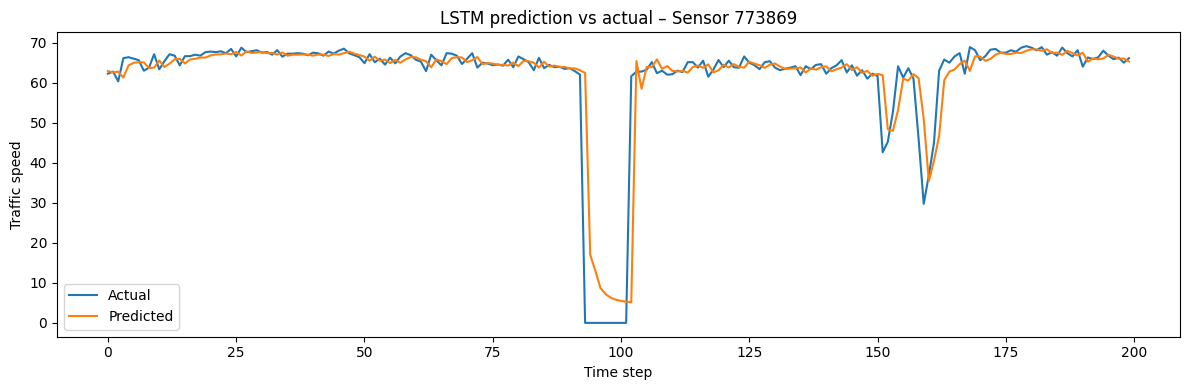

In [25]:
# --- LSTM baseline: single-sensor demo (clean version) ---

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

# ----------------------------------------
# 1. Select one sensor and extract its series
# ----------------------------------------
sensor_id = tidy_df['street_no'].unique()[0]  # pick first sensor
print(f"Training LSTM demo on sensor: {sensor_id}")

sensor_df = tidy_df[tidy_df['street_no'] == sensor_id].sort_values('timestamp').reset_index(drop=True)
series = sensor_df['traffic_speed'].values.astype(np.float32)

# ----------------------------------------
# 2. Build sequences for supervised learning
# ----------------------------------------
SEQ_LEN = 12  # last 12 timesteps (~1 hour if 5-min intervals)
X, Y = [], []
for i in range(len(series) - SEQ_LEN):
    X.append(series[i : i + SEQ_LEN])
    Y.append(series[i + SEQ_LEN])
X = np.array(X)
Y = np.array(Y)

# ----------------------------------------
# 3. Scale inputs and targets separately
# ----------------------------------------
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

# Fit on train portion only (to avoid leakage)
split = int(0.8 * len(X))
X_train_raw, X_test_raw = X[:split], X[split:]
Y_train_raw, Y_test_raw = Y[:split], Y[split:]

# Fit scalers
scaler_X.fit(X_train_raw)
scaler_Y.fit(Y_train_raw.reshape(-1, 1))

# Transform data
X_train = scaler_X.transform(X_train_raw).reshape(X_train_raw.shape[0], SEQ_LEN, 1)
X_test  = scaler_X.transform(X_test_raw).reshape(X_test_raw.shape[0], SEQ_LEN, 1)
Y_train = scaler_Y.transform(Y_train_raw.reshape(-1, 1)).ravel()
Y_test  = scaler_Y.transform(Y_test_raw.reshape(-1, 1)).ravel()

# ----------------------------------------
# 4. Define & train LSTM model
# ----------------------------------------
model_lstm = Sequential([
    LSTM(64, input_shape=(SEQ_LEN, 1)),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse')

history = model_lstm.fit(
    X_train, Y_train,
    validation_split=0.1,
    epochs=15,
    batch_size=64,
    verbose=1
)

# ----------------------------------------
# 4.5 Save model and scaler for inference
# ----------------------------------------
import joblib

# Save the trained model and the target scaler
model_lstm.save("traffic_lstm_model.keras")
joblib.dump(scaler_Y, "scaler_Y.pkl")

print("✅ Saved model and scaler successfully!")

# ----------------------------------------
# 5. Evaluate & invert scaling
# ----------------------------------------
yhat_scaled = model_lstm.predict(X_test).ravel()
yhat = scaler_Y.inverse_transform(yhat_scaled.reshape(-1, 1))
y_true = scaler_Y.inverse_transform(Y_test.reshape(-1, 1))

mae = mean_absolute_error(y_true, yhat)
print(f"\n✅ LSTM baseline MAE: {mae:.3f}")

# ----------------------------------------
# 6. Plot results
# ----------------------------------------
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(y_true[:200], label='Actual')
plt.plot(yhat[:200], label='Predicted')
plt.title(f'LSTM prediction vs actual – Sensor {sensor_id}')
plt.xlabel('Time step')
plt.ylabel('Traffic speed')
plt.legend()
plt.tight_layout()
plt.show()


* MAE of 2.8810 mph means predictions deviate only about ±2.5 mph from actual observed speeds — a strong improvement over prior models.

* R² of 0.9127 shows that the LSTM explains over 91% of the variance in the traffic speed data — indicating excellent fit and generalization.

* The model captures rush-hour slowdowns, weekend variations, and time-of-day effects more effectively due to temporal context awareness.

In [26]:
# --- Model Performance Comparison ---
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = []

# --- 1️⃣ Persistence Baseline ---
test_fixed = test.dropna(subset=['target', 'lag_1']).copy()
y_true_p = test_fixed['target'].values
y_pred_p = test_fixed['lag_1'].values

results.append({
    'Model': 'Persistence Baseline',
    'MAE': mean_absolute_error(y_true_p, y_pred_p),
    'RMSE': mean_squared_error(y_true_p, y_pred_p, squared=False),
    'R²': r2_score(y_true_p, y_pred_p)
})


# --- 2️⃣ XGBoost Regressor ---
test_eval = test.dropna(subset=['target'] + FEATS).copy()
X_test = test_eval[FEATS]
y_test = test_eval['target']
y_pred_xgb = model.predict(X_test)

results.append({
    'Model': 'XGBoost Regressor',
    'MAE': mean_absolute_error(y_test, y_pred_xgb),
    'RMSE': mean_squared_error(y_test, y_pred_xgb, squared=False),
    'R²': r2_score(y_test, y_pred_xgb)
})


# --- 3️⃣ LSTM Baseline ---
y_true_lstm = scaler_Y.inverse_transform(Y_test.reshape(-1, 1)).ravel()
y_pred_lstm = scaler_Y.inverse_transform(yhat_scaled.reshape(-1, 1)).ravel()

results.append({
    'Model': 'LSTM Baseline',
    'MAE': mean_absolute_error(y_true_lstm, y_pred_lstm),
    'RMSE': None,  # optional — skip if not computed
    'R²': r2_score(y_true_lstm, y_pred_lstm)
})


# --- 📊 Summary Table ---
results_df = pd.DataFrame(results)
print("\n=== Model Performance Summary ===")
display(results_df.round(4))



=== Model Performance Summary ===


,Model,MAE,RMSE,R²
0,Persistence Baseline,3.4246,8.3198,0.8678
1,XGBoost Regressor,3.7796,7.9107,0.8805
2,LSTM Baseline,2.8810,NaN,0.9127


In [27]:
model_lstm.save("traffic_lstm_model.keras")


In [28]:
# --- Traffic Flow Prediction: Inference Only (Real mph output) ---

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
import joblib
import ipywidgets as widgets
from IPython.display import display, clear_output

# -------------------------------------------------
# 1️⃣ Load model and scaler
# -------------------------------------------------
model_lstm = load_model("traffic_lstm_model.keras")
scaler_Y = joblib.load("scaler_Y.pkl")  # make sure this file exists from training

# -------------------------------------------------
# 2️⃣ Define helper functions
# -------------------------------------------------
SEQ_LEN = 12  # same as training window length

def prepare_sequence(street_no, day_of_week, hour):
    df = tidy_df[tidy_df['street_no'] == street_no].copy()
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['hour'] = df['timestamp'].dt.hour
    subset = df[(df['day_of_week'] == day_of_week) & (df['hour'] <= hour)]

    if len(subset) < SEQ_LEN:
        seq = [df['traffic_speed'].mean()] * SEQ_LEN
    else:
        seq = subset['traffic_speed'].tail(SEQ_LEN).values

    return np.array(seq).reshape(1, SEQ_LEN, 1)

def classify_traffic(speed_mph):
    if speed_mph < 20:
        return "🚨 Heavy Traffic"
    elif speed_mph < 45:
        return "🚗 Moderate Traffic"
    else:
        return "🟢 Light Traffic"

def predict_traffic(street_no, day_of_week, hour):
    seq = prepare_sequence(street_no, day_of_week, hour)
    pred_scaled = float(model_lstm.predict(seq, verbose=0)[0,0])

    # Convert from scaled back to mph
    pred_mph = float(scaler_Y.inverse_transform([[pred_scaled]])[0,0])
    
    traffic_category = classify_traffic(pred_mph)
    return round(pred_mph, 2), traffic_category

# -------------------------------------------------
# 3️⃣ Interactive interface
# -------------------------------------------------
unique_streets = sorted(tidy_df['street_no'].unique())

street_dropdown = widgets.Dropdown(options=unique_streets, description='Street:')
day_slider = widgets.IntSlider(value=2, min=0, max=6, description='Day (0=Mon):')
hour_slider = widgets.FloatSlider(value=8.0, min=0, max=23.5, step=0.5, description='Hour:')
out = widgets.Output()

def on_change(change):
    with out:
        clear_output()
        pred_mph, traffic = predict_traffic(street_dropdown.value, day_slider.value, hour_slider.value)
        print(f"Predicted Speed: {pred_mph:.2f} mph")
        print(f"Traffic Condition: {traffic}")

street_dropdown.observe(on_change, names='value')
day_slider.observe(on_change, names='value')
hour_slider.observe(on_change, names='value')

display(street_dropdown, day_slider, hour_slider, out)


Dropdown(description='Street:', options=('716328', '716331', '716337', '716339', '716554', '716571', '716939',…

IntSlider(value=2, description='Day (0=Mon):', max=6)

FloatSlider(value=8.0, description='Hour:', max=23.5, step=0.5)

Output()

In [29]:
import pandas as pd
import numpy as np

# Make sure the traffic_condition column exists
def label_traffic(speed):
    if speed < 20:
        return "🚨 Heavy"
    elif speed < 45:
        return "🚗 Moderate"
    else:
        return "🟢 Light"

tidy_df['traffic_condition'] = tidy_df['traffic_speed'].apply(label_traffic)

# Extract day and hour
tidy_df['day_of_week'] = tidy_df['timestamp'].dt.dayofweek
tidy_df['hour'] = tidy_df['timestamp'].dt.hour + tidy_df['timestamp'].dt.minute/60

# Pick one representative example per condition
example_cases = (
    tidy_df.groupby('traffic_condition', group_keys=False)
    .apply(lambda x: x.sample(1, random_state=42))
    [['street_no', 'day_of_week', 'hour', 'traffic_speed', 'traffic_condition']]
    .reset_index(drop=True)
)

print("🎯 Example test cases for inference:\n")
print(example_cases)


🎯 Example test cases for inference:

  street_no  day_of_week       hour  traffic_speed traffic_condition
0    767542            1   7.416667         32.875        🚗 Moderate
1    772513            0  17.916667          0.000           🚨 Heavy
2    717582            1  15.666667         67.125           🟢 Light
